In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

from src.autoencoder import Autoencoder, VariationalAutoEncoder
from utils.mnist_loader import data_download, data_loader
from utils.model_trainer import autoencoder_trainer, vae_trainer
from utils.visualization import visualization

In [2]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda:0" if USE_CUDA else "cpu")
EPOCHS = 1
print(DEVICE)
train_data, test_data = data_download()
train_loader, test_loader = data_loader(train_data, test_data, batch_size=256)

cuda:0
number of training data :  60000
number of test data :  10000


# Autoencoder

In [3]:
ae=Autoencoder(n_hidden=256, z_dim=64).to(DEVICE)
criteria = nn.MSELoss()
optimizer = torch.optim.Adam(ae.parameters(), lr=0.001)

In [4]:
train_loss, test_loss = autoencoder_trainer(model=ae, 
                                            criteria=criteria, optimizer=optimizer, 
                                            train_loader=train_loader, test_loader=test_loader, 
                                            device=DEVICE, epochs = EPOCHS)

100%|██████████| 1/1 [01:11<00:00, 71.24s/it]

epochs: 1 - Train loss: 0.06098644807934761 - Test loss: 0.05855049192905426


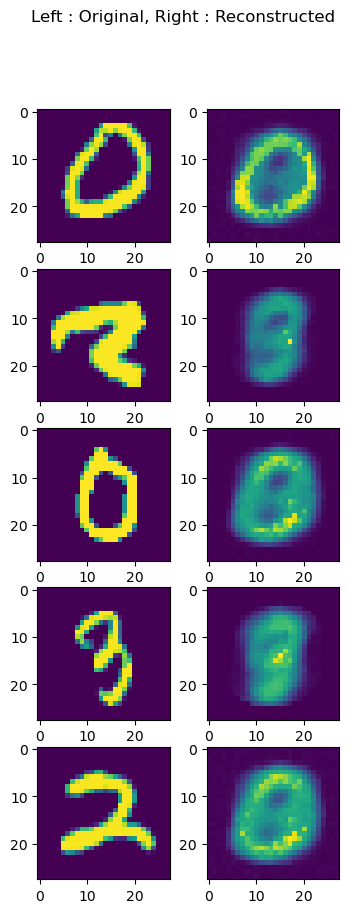

In [6]:
visualization(loader=test_loader, model=ae, device=DEVICE, num_of_samples=5)

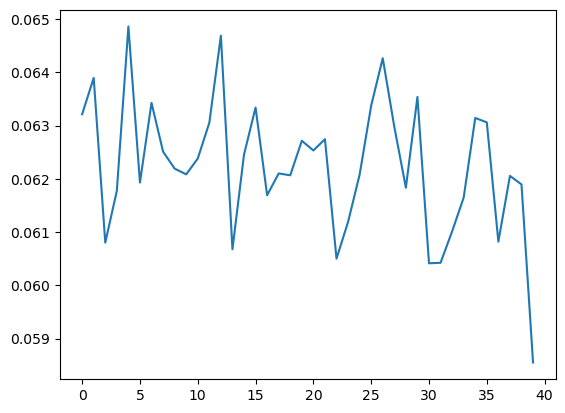

In [7]:
plt.plot(np.array(test_loss))
plt.show()

# Variational Autoencoder

In [8]:
def vae_loss(reconstruction, x, mu, log_var):
    reconstruction_loss = nn.functional.binary_cross_entropy(reconstruction, x, reduction='sum') # bernoulli distribution assumption
    kl_loss = - 0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return reconstruction_loss, kl_loss

In [9]:
vae = VariationalAutoEncoder(n_hidden=336, z_dim=128).to(DEVICE)
optimizer = torch.optim.Adam(vae.parameters(), lr=0.001)
criteria = vae_loss

In [10]:
train_loss, test_loss = vae_trainer(model=vae, 
                                    criteria=criteria, optimizer=optimizer, 
                                    train_loader=train_loader, test_loader=test_loader, 
                                    device=DEVICE, epochs = EPOCHS)

  0%|          | 0/1 [00:00<?, ?it/s]

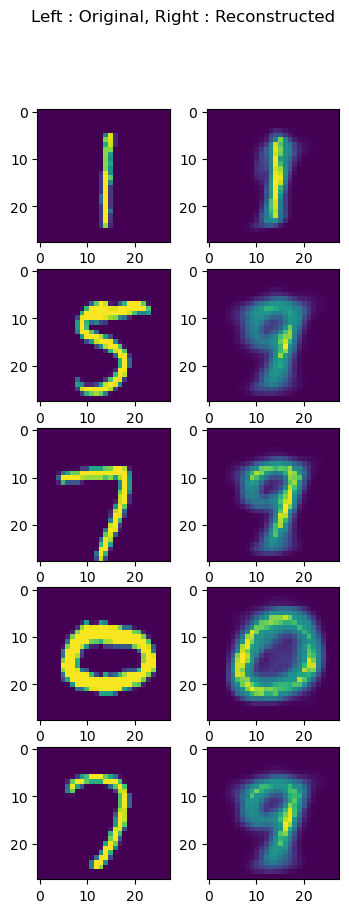

In [ ]:
visualization(loader=test_loader, model=vae, device=DEVICE, num_of_samples=5)

<Figure size 200x200 with 0 Axes>

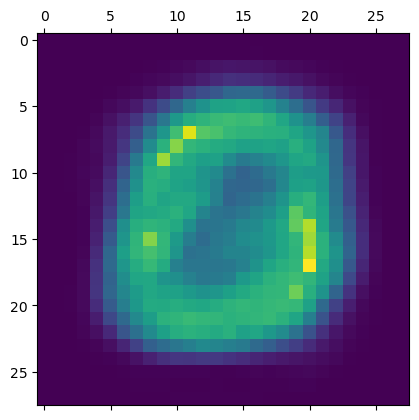

<Figure size 200x200 with 0 Axes>

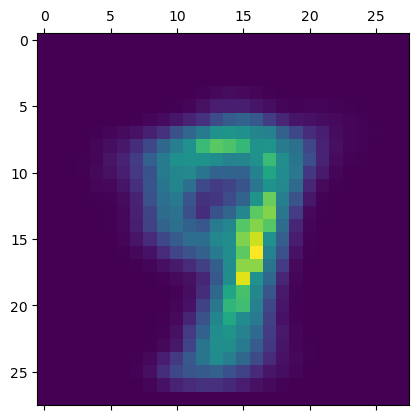

<Figure size 200x200 with 0 Axes>

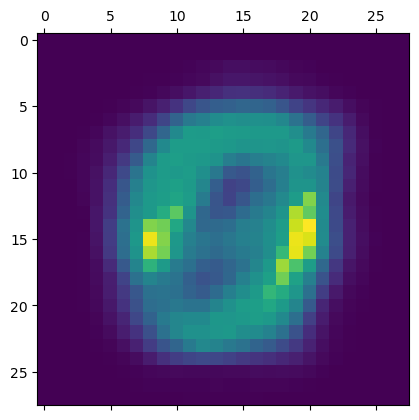

<Figure size 200x200 with 0 Axes>

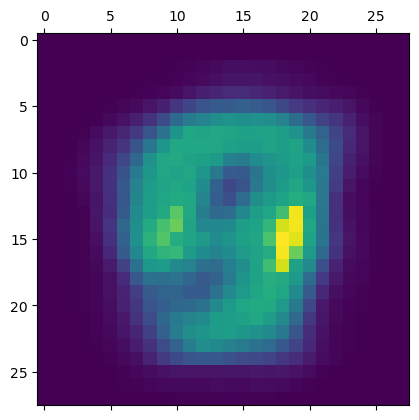

<Figure size 200x200 with 0 Axes>

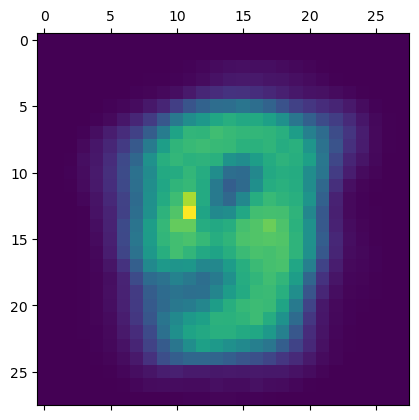

In [ ]:
vae.cpu()
generated_samples = vae.generate(5)

for sample in generated_samples:
    plt.matshow(sample.reshape(28,28))
    plt.show()

In [ ]:
plt.plot(np.array(test_loss))
plt.show()